<a href="https://colab.research.google.com/github/KrishChothani/AI_ML/blob/main/ML_PRACT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import pandas as pd

df = pd.read_csv('BostonHousing.csv')

X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

print("Coefficients:", lasso.coef_)

Mean Squared Error: 25.155593753934173
Coefficients: [-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442]


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
df = pd.read_csv('BostonHousing.csv')

X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", ridge.coef_)

Mean Squared Error: 24.477191227708644
Coefficients: [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]


Epoch 100: Cost = 49.4462
Epoch 200: Cost = 18.1001
Epoch 300: Cost = 13.8233
Epoch 400: Cost = 13.1834
Epoch 500: Cost = 13.0520

Final Parameters (theta):
[ 2.23847549e+01 -5.33491473e-01  4.42478805e-01 -2.87148432e-01
  7.03842637e-01 -8.63788875e-01  3.15012628e+00 -1.02038500e-02
 -1.72629832e+00  5.00306193e-01 -3.27780078e-01 -1.77534246e+00
  8.05357049e-01 -3.46843858e+00]


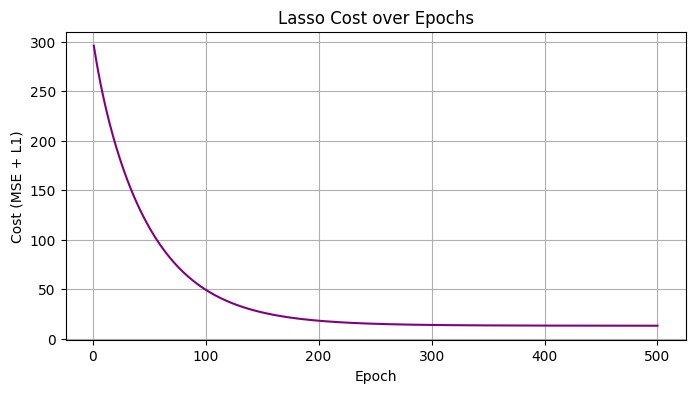

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BostonHousing.csv")

X = df.drop(columns=["medv"]).values
y = df["medv"].values

X = (X - X.mean(axis=0)) / X.std(axis=0)

X = np.c_[np.ones(X.shape[0]), X]

m, n = X.shape
alpha = 0.01
iterations = 500
lambda_l1 = 0.1

theta = np.zeros(n)
cost_history = []

for epoch in range(1, iterations + 1):

    y_pred = X @ theta
    error = y_pred - y

    cost = (1/(2*m)) * np.sum(error**2) + lambda_l1 * np.sum(np.abs(theta[1:]))
    cost_history.append(cost)

    grad = (1/m) * (X.T @ error)
    theta[0] -= alpha * grad[0]

    for j in range(1, n):
        theta[j] -= alpha * (grad[j] + lambda_l1 * np.sign(theta[j]))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost:.4f}")
print("\nFinal Parameters (theta):")
print(theta)

plt.figure(figsize=(8, 4))
plt.plot(range(1, iterations + 1), cost_history, color="purple")
plt.title("Lasso Cost over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE + L1)")
plt.grid(True)
plt.show()



In [ ]:
n_features = X_train.shape[1]
coeffs = np.zeros(n_features)

n_iterations = 1000
lambda_val = ridge.alpha

for _ in range(n_iterations):
    for j in range(n_features):
        y_pred_current = X_train @ coeffs

        partial_residual = y_train - (y_pred_current - X_train.iloc[:, j] * coeffs[j])

        rho = (X_train.iloc[:, j] * partial_residual).sum()
        z = (X_train.iloc[:, j] ** 2).sum()

        coeffs[j] = rho / (z + lambda_val)

print("Manual Ridge Coefficients:", coeffs)

manual_y_pred = X_test @ coeffs
manual_mse = mean_squared_error(y_test, manual_y_pred)
print(f"Manual Ridge Mean Squared Error: {manual_mse}")

print("Scikit-learn Ridge Coefficients:", ridge.coef_)
print(f"Scikit-learn Ridge Mean Squared Error: {mse}")

Manual Ridge Coefficients: [-0.1000272   0.03490414  0.02271266  2.59552684 -3.15162047  6.08477641
 -0.01247893 -1.00466312  0.14164425 -0.0082609  -0.44876903  0.01672735
 -0.43780369]
Manual Ridge Mean Squared Error: 28.838633807361845
Scikit-learn Ridge Coefficients: [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]
Scikit-learn Ridge Mean Squared Error: 24.477191227708644


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("BostonHousing.csv")
df = df.fillna(df.mean())
scaler = StandardScaler()

X = scaler.fit_transform(df.drop("medv", axis=1))
X = np.c_[np.ones(X.shape[0]), X]   # add bias

y = df["medv"].values

print(np.isnan(preds).any())


# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# Linear Regression from Scratch
# -------------------------
class LinearRegressionScratch:
    def __init__(self, lr=0.01, n_iters=1000, reg_type=None, lam=0.1):
        self.lr = lr
        self.n_iters = n_iters
        self.reg_type = reg_type  # None, "l1", "l2"
        self.lam = lam
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        for _ in range(self.n_iters):
            y_pred = X.dot(self.theta)
            error = y_pred - y

            # Gradient for MSE
            grad = (1/m) * X.T.dot(error)

            # Add regularization
            if self.reg_type == "l2":  # Ridge
                grad += (self.lam/m) * self.theta
                grad[0] -= (self.lam/m) * self.theta[0]  # don't regularize bias
            elif self.reg_type == "l1":  # Lasso
                grad += (self.lam/m) * np.sign(self.theta)
                grad[0] -= (self.lam/m) * np.sign(self.theta[0])  # don't reg bias

            # Update weights
            self.theta -= self.lr * grad

    def predict(self, X):
        return X.dot(self.theta)

# -------------------------
# Training from scratch
# -------------------------
model = LinearRegressionScratch(lr=0.001, n_iters=5000, reg_type="l2", lam=1.0)
model.fit(X_train, y_train)
preds = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, preds))
print("R2 Score:", r2_score(y_test, preds))


True
MSE: 26.285213257980942
R2 Score: 0.6415674723815084


In [ ]:
from sklearn.linear_model import LinearRegression
X = df.drop("medv", axis=1)
y = df["medv"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)
print("Multiple LR R2:", r2_score(y_test, preds))


        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R2:", ridge.score(X_test, y_test))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso R2:", lasso.score(X_test, y_test))


Ridge R2: 0.6662221670168523
Lasso R2: 0.6569712802223936


Epoch 100: Cost = 72.0293
Epoch 200: Cost = 41.3064
Epoch 300: Cost = 37.1901
Epoch 400: Cost = 36.6387
Epoch 500: Cost = 36.5648

Final Parameters (theta):
[22.3847549  -3.34136996]


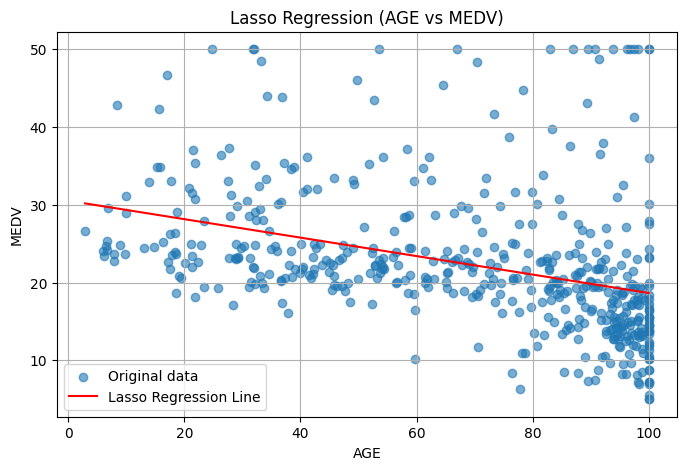

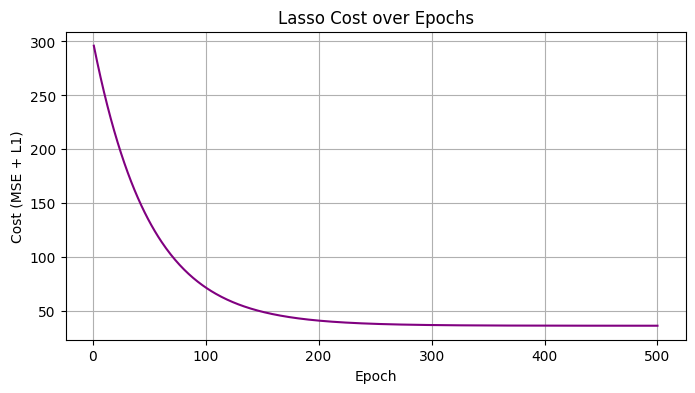

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BostonHousing.csv")

X = df[["age"]].values
y = df["medv"].values

X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.c_[np.ones(X.shape[0]), X]

m, n = X.shape
alpha = 0.01
iterations = 500
lambda_l1 = 0.1

theta = np.zeros(n)
cost_history = []

for epoch in range(1, iterations + 1):
    y_pred = X @ theta
    error = y_pred - y
    cost = (1/(2*m)) * np.sum(error**2) + lambda_l1 * np.sum(np.abs(theta[1:]))
    cost_history.append(cost)
    grad = (1/m) * (X.T @ error)
    theta[0] -= alpha * grad[0]
    theta[1] -= alpha * (grad[1] + lambda_l1 * np.sign(theta[1]))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost:.4f}")

print("\nFinal Parameters (theta):")
print(theta)

plt.figure(figsize=(8, 5))
plt.scatter(df["age"], y, label="Original data", alpha=0.6)
x_vals = np.linspace(df["age"].min(), df["age"].max(), 100)
x_norm = (x_vals - df["age"].mean()) / df["age"].std()
y_line = theta[0] + theta[1] * x_norm
plt.plot(x_vals, y_line, color="red", label="Lasso Regression Line")
plt.title("Lasso Regression (AGE vs MEDV)")
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(1, iterations + 1), cost_history, color="purple")
plt.title("Lasso Cost over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE + L1)")
plt.grid(True)
plt.show()


Epoch 100: Cost = 72.3726
Epoch 200: Cost = 41.9021
Epoch 300: Cost = 37.8382
Epoch 400: Cost = 37.2954
Epoch 500: Cost = 37.2228

Final Parameters (theta):
[22.3847549  -2.87931983]


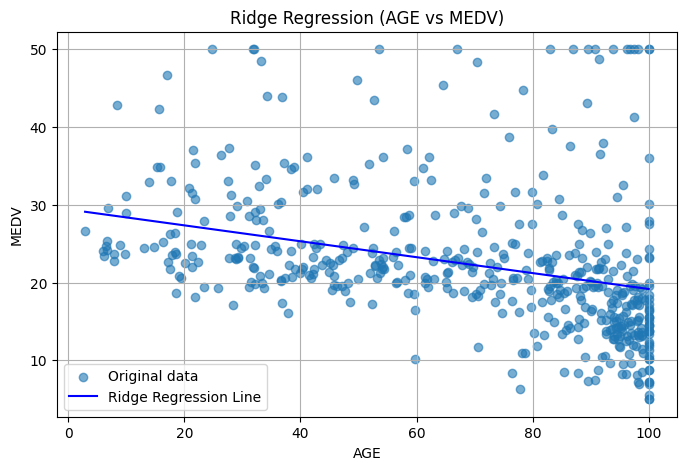

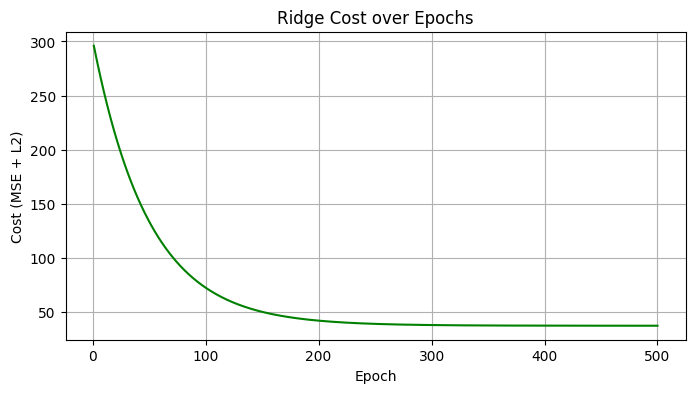

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BostonHousing.csv")

X = df[["age"]].values
y = df["medv"].values

X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.c_[np.ones(X.shape[0]), X]

m, n = X.shape
alpha = 0.01
iterations = 500
lambda_l2 = 0.1

theta = np.zeros(n)
cost_history = []

for epoch in range(1, iterations + 1):
    y_pred = X @ theta
    error = y_pred - y
    cost = (1/(2*m)) * np.sum(error**2) + lambda_l2 * np.sum(theta[1:]**2)
    cost_history.append(cost)
    grad = (1/m) * (X.T @ error)
    theta[0] -= alpha * grad[0]
    for j in range(1, n):
        theta[j] -= alpha * (grad[j] + 2 * lambda_l2 * theta[j])
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost:.4f}")

print("\nFinal Parameters (theta):")
print(theta)

plt.figure(figsize=(8, 5))
plt.scatter(df["age"], y, label="Original data", alpha=0.6)
x_vals = np.linspace(df["age"].min(), df["age"].max(), 100)
x_norm = (x_vals - df["age"].mean()) / df["age"].std()
y_line = theta[0] + theta[1] * x_norm
plt.plot(x_vals, y_line, color="blue", label="Ridge Regression Line")
plt.title("Ridge Regression (AGE vs MEDV)")
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(1, iterations + 1), cost_history, color="green")
plt.title("Ridge Cost over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE + L2)")
plt.grid(True)
plt.show()


Epoch 100: Cost = 50.2066
Epoch 200: Cost = 19.2619
Epoch 300: Cost = 15.0971
Epoch 400: Cost = 14.5133
Epoch 500: Cost = 14.4217

Final Parameters (theta):
[22.3847549  -0.61931525  0.51111499 -0.44106907  0.75154121 -0.76213795
  2.8500654  -0.19032627 -1.51040739  0.52387163 -0.48848757 -1.62733564
  0.78383236 -2.90012621]


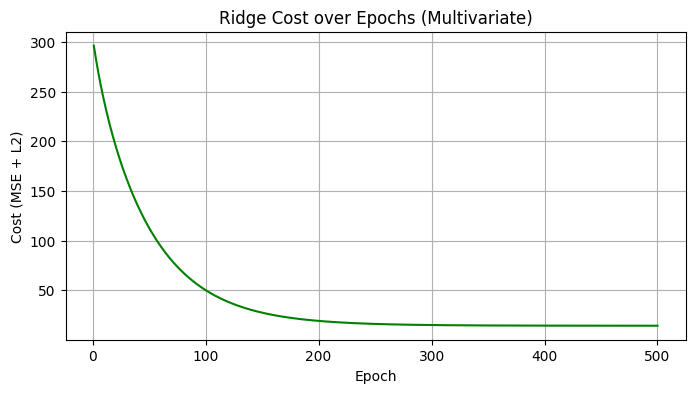

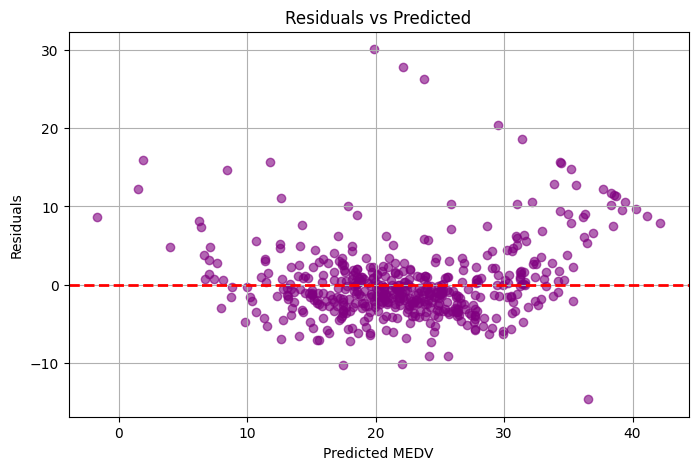

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BostonHousing.csv")

X = df.drop(columns=["medv"]).values
y = df["medv"].values

X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.c_[np.ones(X.shape[0]), X]

m, n = X.shape
alpha = 0.01
iterations = 500
lambda_l2 = 0.1

theta = np.zeros(n)
cost_history = []

for epoch in range(1, iterations + 1):
    y_pred = X @ theta
    error = y_pred - y
    cost = (1/(2*m)) * np.sum(error**2) + lambda_l2 * np.sum(theta[1:]**2)
    cost_history.append(cost)
    grad = (1/m) * (X.T @ error)
    theta[0] -= alpha * grad[0]
    for j in range(1, n):
        theta[j] -= alpha * (grad[j] + 2 * lambda_l2 * theta[j])
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost:.4f}")

print("\nFinal Parameters (theta):")
print(theta)

plt.figure(figsize=(8, 4))
plt.plot(range(1, iterations + 1), cost_history, color="green")
plt.title("Ridge Cost over Epochs (Multivariate)")
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE + L2)")
plt.grid(True)
plt.show()

residuals = y - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color="purple")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BostonHousing.csv")

X = df.drop(columns=["medv"]).values
y = df["medv"].values

X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.c_[np.ones(X.shape[0]), X]

m, n = X.shape
alpha = 0.01
iterations = 500
lambda_l2 = 0.1

theta = np.zeros(n)
cost_history = []

for epoch in range(1, iterations + 1):
    y_pred = X @ theta
    error = y_pred - y
    cost = (1/(2*m)) * np.sum(error**2) + lambda_l2 * np.sum(theta[1:]**2)
    cost_history.append(cost)
    grad = (1/m) * (X.T @ error)
    theta[0] -= alpha * grad[0]
    for j in range(1, n):
        theta[j] -= alpha * (grad[j] + 2 * lambda_l2 * theta[j])
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost:.4f}")

print("\nFinal Parameters (theta):")
print(theta)

plt.figure(figsize=(8, 4))
plt.plot(range(1, iterations + 1), cost_history, color="green")
plt.title("Ridge Cost over Epochs (Multivariate)")
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE + L2)")
plt.grid(True)
plt.show()
